In [192]:

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [193]:
df=pd.read_csv(f'../data/raw/diamonds_train.csv')
dfpredict=pd.read_csv(f'../data/raw/diamonds_predict.csv')


In [194]:
df['df_original']=1
dfpredict['df_original']=0
print(df.shape)
print(dfpredict.shape)

df=pd.concat([df,dfpredict], axis=0)
df['df_original'].value_counts()


(40455, 11)
(13485, 11)


1    40455
0    13485
Name: df_original, dtype: int64

In [195]:
print(df.info(memory_usage='deep'))
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 13484
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53940 non-null  float64
 1   cut          53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   depth        53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        40455 non-null  float64
 7   x            53940 non-null  float64
 8   y            53940 non-null  float64
 9   z            53940 non-null  float64
 10  df_original  53940 non-null  int64  
 11  id           13485 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 13.9 MB
None


,carat,depth,table,price,x,y,z,df_original,id
count,53940.000000,53940.000000,53940.000000,40455.000000,53940.000000,53940.000000,53940.000000,53940.000000,13485.000000
mean,0.797940,61.749405,57.457184,3928.444469,5.731157,5.734526,3.538734,0.750000,6742.000000
std,0.474011,1.432621,2.234491,3992.416147,1.121761,1.142135,0.705699,0.433017,3892.928525
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000,0.750000,3371.000000
50%,0.700000,61.800000,57.000000,2397.000000,5.700000,5.710000,3.530000,1.000000,6742.000000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000,1.000000,10113.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,13484.000000


In [196]:
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 13484
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   carat        53940 non-null  float64 
 1   cut          53940 non-null  category
 2   color        53940 non-null  category
 3   clarity      53940 non-null  category
 4   depth        53940 non-null  float64 
 5   table        53940 non-null  float64 
 6   price        40455 non-null  float64 
 7   x            53940 non-null  float64 
 8   y            53940 non-null  float64 
 9   z            53940 non-null  float64 
 10  df_original  53940 non-null  int64   
 11  id           13485 non-null  float64 
dtypes: category(3), float64(8), int64(1)
memory usage: 4.3 MB


In [197]:
df['cut_int']=''

df.loc[df['cut']=='Fair','cut_int']=1
df.loc[df['cut']=='Good','cut_int']=2
df.loc[df['cut']=='Very Good','cut_int']=3
df.loc[df['cut']=='Premium','cut_int']=4
df.loc[df['cut']=='Ideal','cut_int']=5

df['cut_int'] = df['cut_int'].astype('int64')

df['color_int']=''

df.loc[df['color']=='J','color_int']=1
df.loc[df['color']=='I','color_int']=2
df.loc[df['color']=='H','color_int']=3
df.loc[df['color']=='G','color_int']=4
df.loc[df['color']=='F','color_int']=5
df.loc[df['color']=='E','color_int']=6
df.loc[df['color']=='D','color_int']=7

# color_group = {"D": "Colorless",
#                        "E": "Colorless",
#                        "F": "Colorless",
#                        "G": "Near Colorless",
#                        "H": "Near Colorless",
#                        "I": "Slighty Tinted",
#                        "J": "Slighty Tinted"}


df['color_int'] = df['color_int'].astype('int64')

df['clarity_int']=''

df.loc[df['clarity']=='I1','clarity_int']=1
df.loc[df['clarity']=='SI2','clarity_int']=2
df.loc[df['clarity']=='SI1','clarity_int']=3
df.loc[df['clarity']=='VS2','clarity_int']=4
df.loc[df['clarity']=='VS1','clarity_int']=5
df.loc[df['clarity']=='VVS2','clarity_int']=6
df.loc[df['clarity']=='VVS1','clarity_int']=7
df.loc[df['clarity']=='IF','clarity_int']=8

# clarity_group = {"IF": "IF",
# #                        "VVS1": "VVS",
# #                        "VVS2": "VVS",
# #                        "VS1": "VS",
# #                        "VS2": "VS",
# #                        "SI1": "SI",
# #                        "SI2": "SI",
# #                        "I1": "I"}


df['clarity_int'] = df['clarity_int'].astype('int64')

In [198]:
df['cut_color_clarity_score'] = df.apply(lambda new: 0.793645*new['cut_int']+10.217867*new['color_int']+18.53525155*new['clarity_int'], axis=1)

In [199]:
df['raw_density'] = (df['carat']*0.2)/(df['x']*df['y']*df['z']/3/1000)
df['raw_density'] = np.where(df['raw_density']==float('Inf'),0,df['raw_density'])


In [200]:
def marketing_carat(x):
    h=0.02
    for z in range(1,3):
        if (z-h)<=x<(z):             #bad 0.91 a 0.99  good  1.00 a 1.04
            y='bad'
            break
        elif (z)<=x<=(z+h+0.02):
            y='good'
            break
        elif 1.48<=x<1.50:
            y='bad'
            break  
        elif 1.50<=x<=1.54:
            y='good'
            break     
            
        else:
            y='regular'
    return y

df['marketing_carat']=df.apply(lambda x: marketing_carat(x['carat']), axis=1) 
    
df['marketing_carat_int']=''

df.loc[df['marketing_carat']=='bad','marketing_carat_int']=1
df.loc[df['marketing_carat']=='regular','marketing_carat_int']=2
df.loc[df['marketing_carat']=='good','marketing_carat_int']=3



df['marketing_carat_int'] = df['marketing_carat_int'].astype('int64')    
df['marketing_carat'].value_counts()


regular    44714
good        9146
bad           80
Name: marketing_carat, dtype: int64

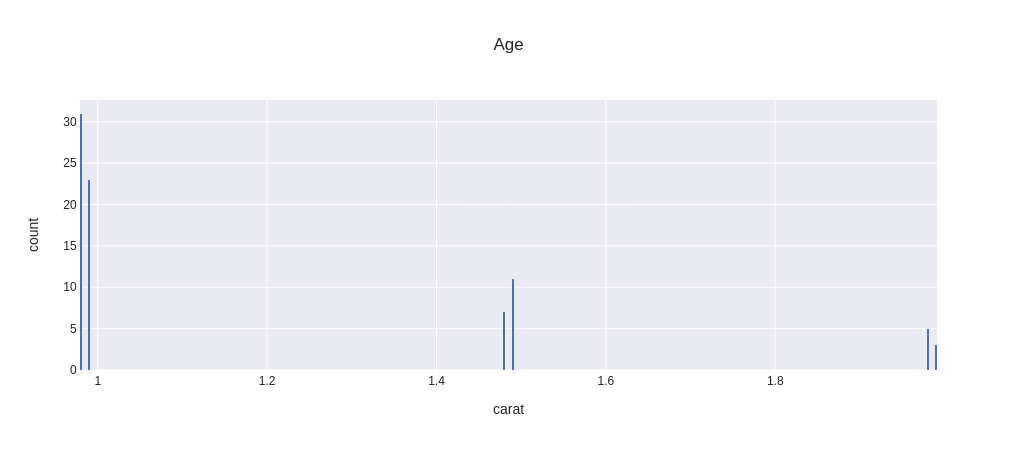

In [201]:
fig=px.histogram(df.loc[df['marketing_carat']=='bad'], x='carat',nbins=1000,template='seaborn',title='Age',barmode='group')
fig.show()

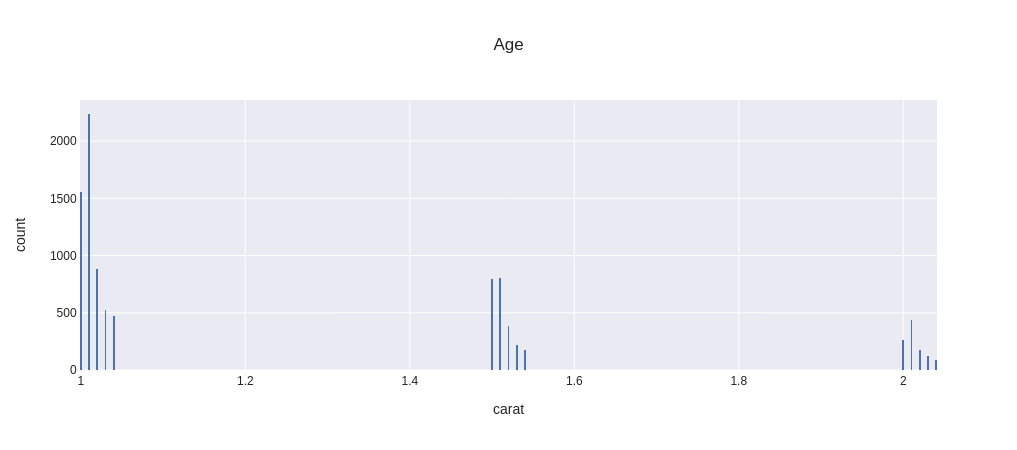

In [202]:
fig=px.histogram(df.loc[df['marketing_carat']=='good'], x='carat',nbins=1000,template='seaborn',title='Age',barmode='group')
fig.show()

In [203]:
df['carat_sqr']=df['carat']**3

# df['carat_sqr'] = np.where(df['carat_sqr']==float('Inf'),0,df['carat_sqr'])

In [204]:
df['high']=''

# high=2.23
# df.loc[df['carat']<high,'high']=1
# df.loc[df['carat']>=high,'high']=2



high=2.23
high2=1.28

df.loc[df['carat']<high2,'high']=1
df.loc[(df['carat']>=high2)&(df['carat']<high),'high']=2
df.loc[df['carat']>=high,'high']=3


df['high'] = df['high'].astype('int64')

df['high'].value_counts()

1    46540
2     6988
3      412
Name: high, dtype: int64

In [205]:


x_y_z_0=df.loc[(df['x']<0.01)|(df['y']<0.01) |(df['z']<0.01)|(df['x']>25)|(df['y']>25)|(df['z']>25)].sort_values(by=['id'], ascending=False).index.to_list()



def deletexyz(a,b,c):
    if b<0.01 or b>25:
        return df.loc[df['carat']==a,c].mean()
    else:
        return b
    
df['x'] = df.apply(lambda new: deletexyz(new['carat'],new['x'],'x'), axis=1)
df['y'] = df.apply(lambda new: deletexyz(new['carat'],new['y'],'y'), axis=1)
df['z'] = df.apply(lambda new: deletexyz(new['carat'],new['z'],'z'), axis=1)




In [206]:
pd.set_option('display.max_rows', 32)
df.loc[x_y_z_0,:]

,carat,cut,color,clarity,depth,table,price,x,y,z,df_original,id,cut_int,color_int,clarity_int,cut_color_clarity_score,raw_density,marketing_carat,marketing_carat_int,carat_sqr,high
7488,0.70,Good,E,VS1,61.3,62.0,3277.0,5.640000,5.720000,3.480000,1,NaN,2,6,5,155.570750,3.741062,regular,2,0.343000,1
7488,1.56,Ideal,G,VS2,62.2,54.0,NaN,7.398991,7.397615,4.536606,0,7488.0,5,4,4,118.980699,0.000000,regular,2,3.796416,2
7336,0.41,Premium,F,VS1,62.4,60.0,1076.0,4.770000,4.710000,2.960000,1,NaN,4,5,5,146.940173,3.699168,regular,2,0.068921,1
7336,0.51,Very Good,E,VS1,61.8,54.7,NaN,5.120000,5.150000,3.198500,0,7336.0,3,6,5,156.364395,0.364936,regular,2,0.132651,1
6685,0.30,Premium,H,VVS1,62.3,58.0,684.0,4.290000,4.320000,2.680000,1,NaN,4,3,7,163.574942,3.624071,regular,2,0.027000,1
6685,1.00,Very Good,H,VS2,63.3,53.0,NaN,6.375796,6.364326,3.946694,0,6685.0,3,3,4,107.175542,0.000000,good,3,1.000000,1
5465,0.46,Good,F,VS1,59.9,61.9,1168.0,5.020000,5.060000,3.010000,1,NaN,2,5,5,145.352883,3.609843,regular,2,0.097336,1
5465,1.12,Premium,G,I1,60.4,59.0,NaN,6.710000,6.670000,4.092231,0,5465.0,4,4,1,62.581300,0.000000,regular,2,1.404928,1
2901,0.70,Good,H,VS2,63.8,60.0,2083.0,5.590000,5.510000,3.540000,1,NaN,2,3,4,106.381897,3.851968,regular,2,0.343000,1
2901,1.20,Premium,D,VVS1,62.1,59.0,NaN,6.781783,6.771705,4.200326,0,2901.0,4,7,7,204.446410,0.000000,regular,2,1.728000,1


In [207]:

# sns.set(font_scale=1)
# dft=df.corr(method='spearman')
# mask = np.triu(np.ones_like(dft, dtype=np.bool))
# f, ax = plt.subplots(figsize=(20, 10))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(dft, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# plt.show()

In [208]:
dfd=pd.get_dummies(df)

In [209]:
df.to_parquet('../data/processed/df.parquet')
dfd.to_parquet('../data/processed/dfd.parquet')

In [210]:
df['df_original'].value_counts()

1    40455
0    13485
Name: df_original, dtype: int64

In [211]:
# print(df['carat_sqr'].describe())

# df[['cut_int','color_int','clarity_int']]

In [212]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# df.loc[(df['raw_density']>=3.855)].sort_values(by='price',ascending=False)

In [213]:
df.shape[0]

53940